# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course</strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Title**: Introduction to Machine Learning || **Session**: 2</em></font>


# Classification: Logistic Regression

Logistic Regression is a supervised learning algorithm used for classification problems.


## Importing Libraries
First, we need to import the necessary libraries.

In [ ]:
!pip install scikit-plot

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt


## Loading Data + EDA


### Diabetes Patient Classification:
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

In [4]:
!gdown 1TAPAqHCgjVt-yI9I46Lu5KWdPve32iI9

Downloading...
From: https://drive.google.com/uc?id=1TAPAqHCgjVt-yI9I46Lu5KWdPve32iI9
To: /content/diabetes.csv
100% 23.9k/23.9k [00:00<00:00, 40.2MB/s]


In [6]:
# import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv("diabetes.csv", header=None, skiprows=1, names=col_names)
print(len(df))

768


In [8]:
df.head(5)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Exploratory Data Analysis (EDA)
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# Correlation Matrix (For Feature Engineering)
corr_matrix = df.corr()
corr_matrix

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
# Check balancement of dataset
df.label.value_counts()

label
0    500
1    268
Name: count, dtype: int64

In [24]:
# Split dataset in features and target variable
X = df[['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']] # Features
y = df.label # Target variable

print("Features Shape:", X.shape)
print("Labels Shape:", y.shape)

Features Shape: (768, 7)
Labels Shape: (768,)


In [25]:
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets (75% train, 0.145% validation, 0.145% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=16)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=16)

In [26]:
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (576, 7), (576,)
Validation set: (96, 7), (96,)
Test set: (96, 7), (96,)


## Training the Logistic Regression Model

We'll train a logistic regression model and evaluate it using accuracy, precision, and recall.

In [27]:
from sklearn.linear_model import LogisticRegression
# Train the model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [30]:
# Predict on the validation set
y_val_pred = model.predict(X_val)
y_val_pred.shape, y_val_pred

((96,),
 array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 0]))

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8229
Precision: 0.7241
Recall: 0.7000


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

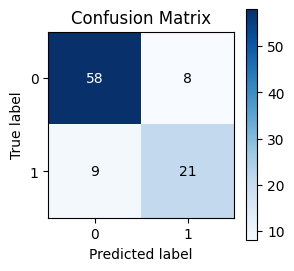

In [32]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_val, y_val_pred, figsize=(3, 3))

In [38]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_val, y_val_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.87      0.88      0.87        66
   with diabetes       0.72      0.70      0.71        30

        accuracy                           0.82        96
       macro avg       0.79      0.79      0.79        96
    weighted avg       0.82      0.82      0.82        96



In [39]:
X_train_reduced = X_train[['glucose', 'bmi']]
X_val_reduced = X_val[['glucose', 'bmi']]

                  precision    recall  f1-score   support

without diabetes       0.84      0.86      0.85        66
   with diabetes       0.68      0.63      0.66        30

        accuracy                           0.79        96
       macro avg       0.76      0.75      0.75        96
    weighted avg       0.79      0.79      0.79        96



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


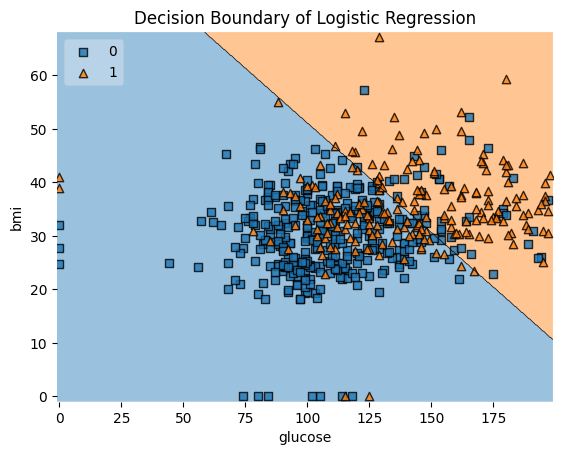

In [40]:
from mlxtend.plotting import plot_decision_regions

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_reduced, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val_reduced)
print(classification_report(y_val, y_val_pred, target_names=target_names))

# Plotting decision regions
plot_decision_regions(X_train_reduced.values, y_train.values, clf=model, legend=2)
plt.xlabel('glucose')
plt.ylabel('bmi')
plt.title('Decision Boundary of Logistic Regression')
plt.show()


                  precision    recall  f1-score   support

without diabetes       0.79      0.98      0.88        66
   with diabetes       0.93      0.43      0.59        30

        accuracy                           0.81        96
       macro avg       0.86      0.71      0.73        96
    weighted avg       0.84      0.81      0.79        96



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


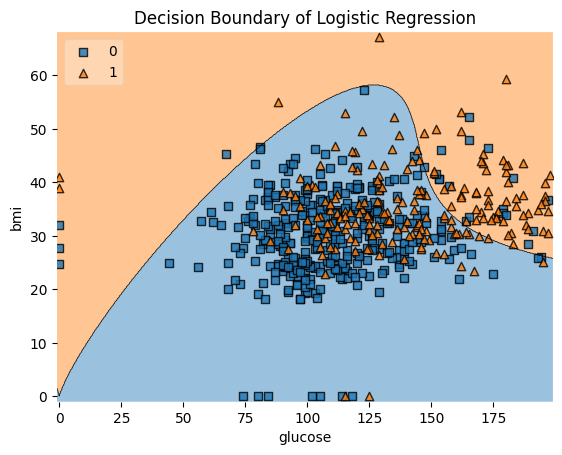

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
model = Pipeline([
    ('poly', PolynomialFeatures(degree=7)),  # Transform features into polynomial features
    ('logreg', LogisticRegression(solver='lbfgs', max_iter=1000))
])
model.fit(X_train_reduced, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val_reduced)
print(classification_report(y_val, y_val_pred, target_names=target_names))

# Plotting decision regions
plot_decision_regions(X_train_reduced.values, y_train.values, clf=model, legend=2)
plt.xlabel('glucose')
plt.ylabel('bmi')
plt.title('Decision Boundary of Logistic Regression')
plt.show()


                  precision    recall  f1-score   support

without diabetes       0.84      0.86      0.85        66
   with diabetes       0.68      0.63      0.66        30

        accuracy                           0.79        96
       macro avg       0.76      0.75      0.75        96
    weighted avg       0.79      0.79      0.79        96



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


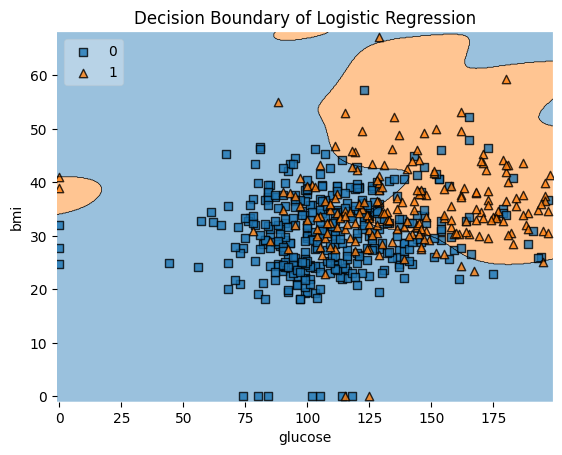

In [43]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('scaler', StandardScaler()),
    ('rbf_sampler', RBFSampler(gamma=1, random_state=42)),
    ('logistic_regression', LogisticRegression())
])

model.fit(X_train_reduced, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val_reduced)
print(classification_report(y_val, y_val_pred, target_names=target_names))

# Plotting decision regions
plot_decision_regions(X_train_reduced.values, y_train.values, clf=model, legend=2)
plt.xlabel('glucose')
plt.ylabel('bmi')
plt.title('Decision Boundary of Logistic Regression')
plt.show()

##  Generalization: Overfiting problem

To demonstrate overfitting, we'll train a logistic regression model on a smaller subset of the training data and compare its performance on the training and validation sets.

In [45]:
# Train the model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict on the training and validation sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_val_test = model.predict(X_test)

# Calculate accuracy for both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_val_test)

print(f"------------------------number data training = {len(X_train)}------------------------")
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Validation accuracy: {val_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

------------------------number data training = 576------------------------
Training accuracy: 0.7743
Validation accuracy: 0.8229
Test accuracy: 0.8125


In [46]:
# Train on a smaller subset
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train,
                                                      test_size=0.98, random_state=13)#13
model_small = LogisticRegression(max_iter=10000)
model_small.fit(X_train_small, y_train_small)

# Predict on the training and validation sets
y_train_small_pred = model_small.predict(X_train_small)
y_val_small_pred = model_small.predict(X_val)
y_test_small_pred = model_small.predict(X_test)

# Calculate accuracy for both sets
train_accuracy_small = accuracy_score(y_train_small, y_train_small_pred)
val_accuracy_small = accuracy_score(y_val, y_val_small_pred)
test_accuracy_small = accuracy_score(y_test, y_test_small_pred)

print(f"------------------------number data in smaller subset of training = {len(X_train_small)}------------------------")
print(f"Training accuracy (small subset): {train_accuracy_small:.4f}")
print(f"Validation accuracy (small subset): {val_accuracy_small:.4f}")
print(f"Test accuracy (small subset): {test_accuracy_small:.4f}")

------------------------number data in smaller subset of training = 11------------------------
Training accuracy (small subset): 1.0000
Validation accuracy (small subset): 0.6042
Test accuracy (small subset): 0.6250


## k-Fold Cross-Validation

We'll use k-fold cross-validation to better evaluate our model's performance.

In [ ]:
# Implement k-fold cross-validation
kf = KFold(n_splits=5)

# Calculate cross-validation scores for accuracy
cv_accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(model, X, y, cv=kf, scoring='precision')
cv_recall = cross_val_score(model, X, y, cv=kf, scoring='recall')

print(f"Cross-validated accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Cross-validated precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"Cross-validated recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")

Cross-validated accuracy: 0.7709 ± 0.0367
Cross-validated precision: 0.7158 ± 0.0303
Cross-validated recall: 0.5754 ± 0.0380


In [ ]:
# Assuming cv_accuracy, cv_precision, and cv_recall are lists containing the respective metrics for each fold

# Print the metrics for each fold
print("Accuracy for each fold:")
for i, acc in enumerate(cv_accuracy, 1):
    print(f"Fold {i}: {acc:.4f}")

print("\nPrecision for each fold:")
for i, prec in enumerate(cv_precision, 1):
    print(f"Fold {i}: {prec:.4f}")

print("\nRecall for each fold:")
for i, rec in enumerate(cv_recall, 1):
    print(f"Fold {i}: {rec:.4f}")


Accuracy for each fold:
Fold 1: 0.7727
Fold 2: 0.7143
Fold 3: 0.7662
Fold 4: 0.8301
Fold 5: 0.7712

Precision for each fold:
Fold 1: 0.7111
Fold 2: 0.6923
Fold 3: 0.7561
Fold 4: 0.6757
Fold 5: 0.7436

Recall for each fold:
Fold 1: 0.5926
Fold 2: 0.5625
Fold 3: 0.5439
Fold 4: 0.6410
Fold 5: 0.5370


# Model Selection: K-Mean

K-Means is an unsupervised learning algorithm used for clustering. It partitions the data into K distinct clusters based on the distance to the cluster centroids.

### Example: Clustering MNIST Dataset

How to Determine the Optimal K for K-Means? The **Silhouette** Method


<div>
    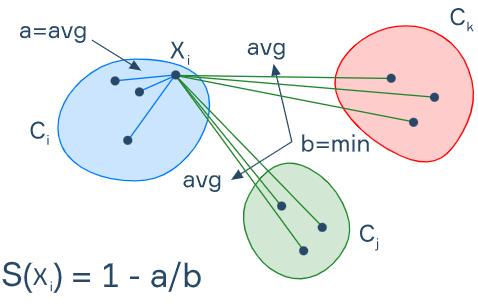 <!-- Adjust the width as needed -->
</div>


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

# Preprocess the data
X = mnist.data.astype(np.float32)
y = mnist.target.astype(int)

# Normalize the data
X /= 255.0

X.shape, y.shape

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


((70000, 784), (70000,))

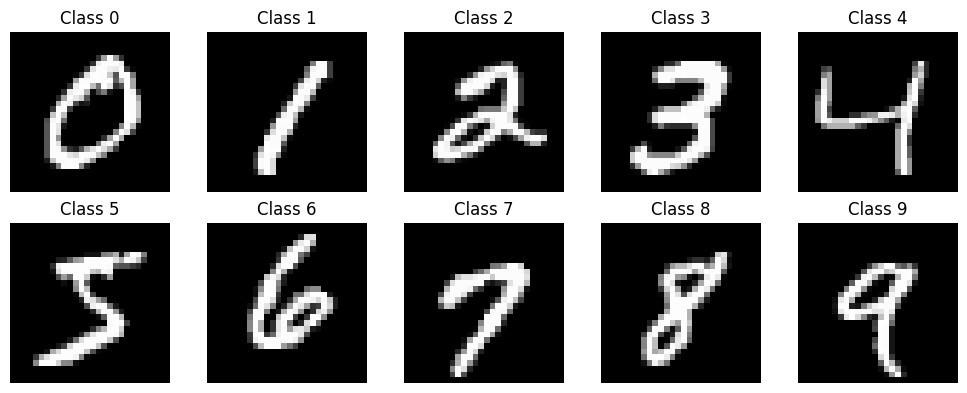

In [ ]:
# Initialize a dictionary to hold one example of each class
examples = {}

# Find one example of each class
for i in range(10):
    examples[i] = X[y == i].to_numpy()[0].reshape(28, 28)

# Plot one example of each class
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(examples[i], cmap='gray')
    plt.title(f'Class {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions for visualization
pca = PCA(2)
X_pca = pca.fit_transform(X)

print("Before PCA", X.shape)
print("After PCA", X_pca.shape)

Before PCA (70000, 784)
After PCA (70000, 2)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

k=2: Silhouette Score = 0.3586
k=3: Silhouette Score = 0.4142
k=4: Silhouette Score = 0.4040
k=5: Silhouette Score = 0.3738
k=6: Silhouette Score = 0.3661
k=7: Silhouette Score = 0.3730
k=8: Silhouette Score = 0.3639
k=9: Silhouette Score = 0.3567
k=10: Silhouette Score = 0.3501
k=11: Silhouette Score = 0.3574
k=12: Silhouette Score = 0.3475
k=13: Silhouette Score = 0.3464
k=14: Silhouette Score = 0.3462
k=15: Silhouette Score = 0.3438
k=16: Silhouette Score = 0.3460
k=17: Silhouette Score = 0.3395
k=18: Silhouette Score = 0.3396
k=19: Silhouette Score = 0.3394


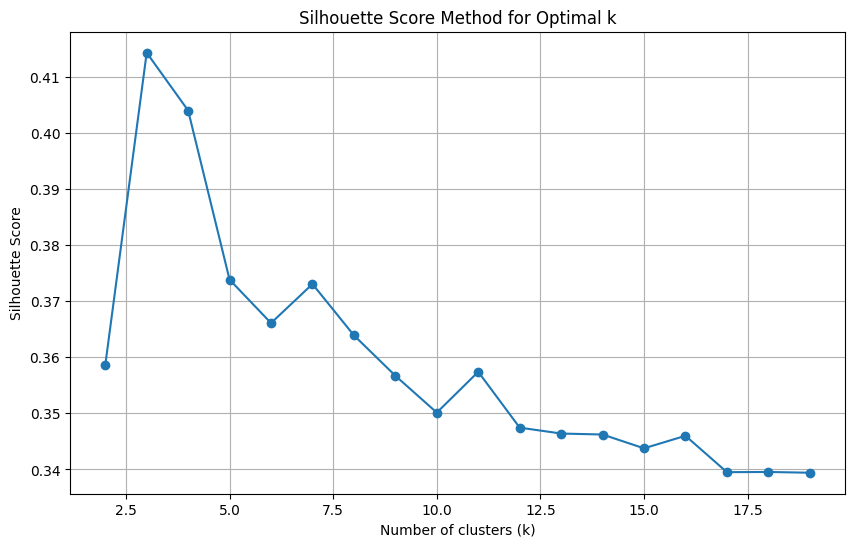

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette Score = {score:.4f}")
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

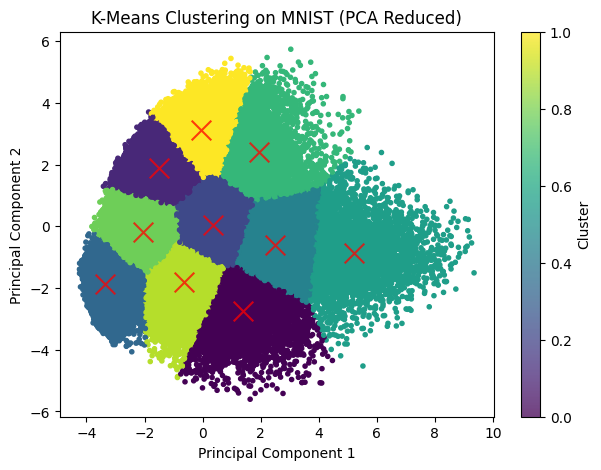

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_pca)

# Predict the cluster for each data point
clusters = kmeans.predict(X_pca)

centers = kmeans.cluster_centers_
# Plot the clusters
plt.figure(figsize=(7, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='.')
scatter = plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('K-Means Clustering on MNIST (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()